In [3]:
import os
os.chdir("../..")

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from fix_data import add_label_T
import matplotlib.pyplot as plt

In [70]:
hcc_smarts_df_train = pd.read_csv("data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep = " ")
mcf_smarts_df_train = pd.read_csv("data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep= " ")

hcc_smarts_df_train = add_label_T(hcc_smarts_df_train)
mcf_smarts_df_train = add_label_T(mcf_smarts_df_train)

X1 = hcc_smarts_df_train.loc[:,hcc_smarts_df_train.columns!='label']
X2 = mcf_smarts_df_train.loc[:,mcf_smarts_df_train.columns!='label']
y = mcf_smarts_df_train["label"]

In [76]:
cls = KNeighborsClassifier(metric="braycurtis", weights="uniform", n_neighbors= 3)

cross = cross_val_score(cls, X2, y, scoring="accuracy", cv=100)
print(f"Accuracy = {round((sum(cross) / 100) * 100, 4)}%")
print(cross)

Accuracy = 100.0%
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


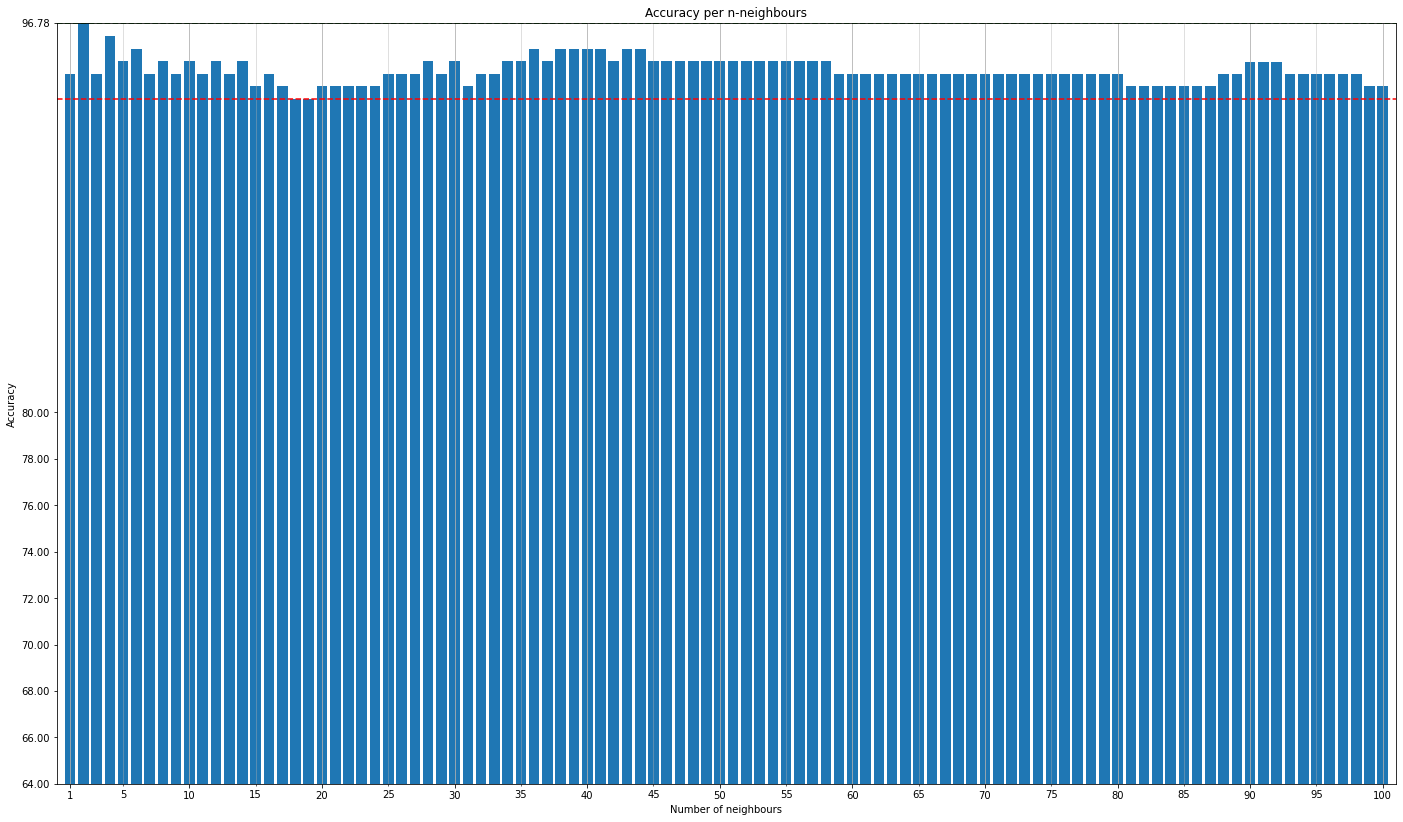

In [8]:
accuracies = []
for i in range(1, 101):
    cls = KNeighborsClassifier(n_neighbors= i)
    cross = cross_val_score(cls, X1, y, scoring= 'accuracy', cv=10)
    accuracies.append(round((sum(cross) / 10) * 100,2 ))

best = max(accuracies)
worst = min(accuracies)

fig, ax = plt.subplots(figsize=(24, 14))
ax.bar([i for i in range(1, 101)], accuracies)
ax.set(xlim=[0, 101], ylim=[65, 80], xlabel='Number of neighbours', ylabel='Accuracy', title='Accuracy per n-neighbours')



ax.axhline(y=best, color='green', linestyle='--')
ax.axhline(y=worst, color='red', linestyle='--')

ax.set_xticks([i*10 if i > 0 else 1 for i in range(11)])
ax.set_xticklabels([i*10 if i > 0 else 1 for i in range(11)])
ax.set_xticks([i for i in range(5,101, 5)], [i for i in range(5,101, 5)], minor= True)
ax.grid(axis= 'x', which= 'major')
ax.grid(axis='x', which= 'minor', alpha= 0.5, fillstyle= 'top')


plt.yticks(list(plt.yticks()[0]) + [best])

plt.show()

# Weights and metric

In [72]:
cls = KNeighborsClassifier()
p_grid = {'n_neighbors': [i for i in range(1, 50)],
          'metric': ['cosine', 'braycurtis'],
          'weights' : ["uniform" ,"distance"]}
          
grid = GridSearchCV(cls, param_grid = p_grid, cv=5, scoring='accuracy').fit(X2, y)
grid.best_params_

{'metric': 'braycurtis', 'n_neighbors': 3, 'weights': 'uniform'}

In [73]:
metr_res = pd.DataFrame(grid.cv_results_)[["param_n_neighbors", "param_weights", 'param_metric', "mean_test_score", "rank_test_score"]]

metr_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
metr_res.iloc[:20,:]

,param_n_neighbors,param_weights,param_metric,mean_test_score,rank_test_score
195,49,distance,braycurtis,1.0,1
185,44,distance,braycurtis,1.0,1
105,4,distance,braycurtis,1.0,1
103,3,distance,braycurtis,1.0,1
102,3,uniform,braycurtis,1.0,1
178,41,uniform,braycurtis,1.0,1
179,41,distance,braycurtis,1.0,1
180,42,uniform,braycurtis,1.0,1
181,42,distance,braycurtis,1.0,1
183,43,distance,braycurtis,1.0,1


In [23]:
cls = KNeighborsClassifier()

p_grid = {'n_neighbors': [i for i in range(1,30)],
          'weights' : ["distance"],
          'metric' : ["minkowski"],
          'p': [i for i in range(1,10)]}
          
gs = GridSearchCV(cls, param_grid = p_grid, cv=5, scoring= 'accuracy').fit(X1, y)
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [24]:
mink_res = pd.DataFrame(gs.cv_results_)[["param_n_neighbors", "param_weights", "param_metric", "param_p", "mean_test_score", "rank_test_score"]]

mink_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
mink_res.iloc[:10,:]

,param_n_neighbors,param_weights,param_metric,param_p,mean_test_score,rank_test_score
28,4,distance,minkowski,2,0.956306,1
208,24,distance,minkowski,2,0.956156,2
190,22,distance,minkowski,2,0.956156,2
46,6,distance,minkowski,2,0.956156,2
10,2,distance,minkowski,2,0.950901,5
1,1,distance,minkowski,2,0.950901,5
27,4,distance,minkowski,1,0.950601,7
37,5,distance,minkowski,2,0.950601,8
217,25,distance,minkowski,2,0.950601,8
199,23,distance,minkowski,2,0.950601,8


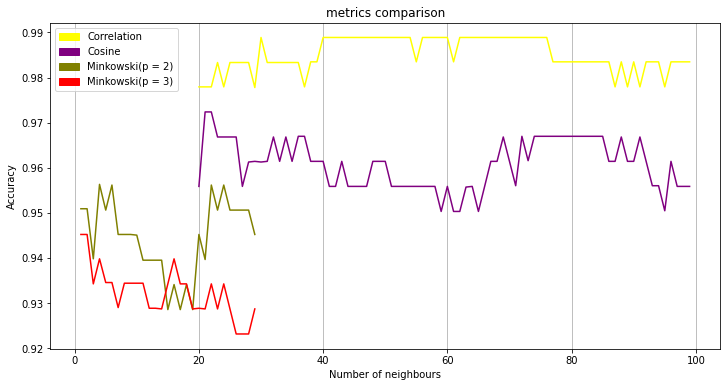

In [51]:
metr_res.sort_values(by="param_n_neighbors", ascending=True, inplace=True)
mink_res.sort_values(by="param_n_neighbors", ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(12,6))

ax.set(xlabel='Number of neighbours', ylabel='Accuracy', title='metrics comparison')

ax.plot([i for k,i in enumerate(metr_res.loc[:,"param_n_neighbors"]) if metr_res.iloc[k, 2] == "braycurtis"], [i for k,i in  enumerate(metr_res.loc[:,"mean_test_score"]) if metr_res.iloc[k, 2] == "braycurtis"], c= "yellow")
ax.plot([i for k,i in enumerate(metr_res.loc[:,"param_n_neighbors"]) if metr_res.iloc[k, 2] == "cosine"], [i for k,i in  enumerate(metr_res.loc[:,"mean_test_score"]) if metr_res.iloc[k, 2] == "cosine"], c= "purple")
ax.plot([i for k,i in enumerate(mink_res.loc[:,"param_n_neighbors"]) if mink_res.iloc[k, 3] == 2], [i for k,i in  enumerate(mink_res.loc[:,"mean_test_score"]) if mink_res.iloc[k, 3] == 2], c= "olive")
ax.plot([i for k,i in enumerate(mink_res.loc[:,"param_n_neighbors"]) if mink_res.iloc[k, 3] == 3], [i for k,i in  enumerate(mink_res.loc[:,"mean_test_score"]) if mink_res.iloc[k, 3] == 3], c= "red")

ax.grid(axis= 'x', which= 'major')

colors= {'Correlation':"yellow", 'Cosine':'Purple', "Minkowski(p = 2)":'olive', "Minkowski(p = 3)":'red'}
label = list(colors.keys())
handle = [plt.Rectangle((0,0),2,2, color=colors[lab]) for lab in label]

ax.legend(handles= handle, labels= label, loc = 0)

plt.show()